In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./train_data/titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('### 학습 데이터 정보 ###')
print(titanic_df.info())

### 학습 데이터 정보 ###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [3]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 개수 0


In [4]:
print('Sex값 분포:')
print(titanic_df['Sex'].value_counts())
print('Cabin값 분포:')
print(titanic_df['Cabin'].value_counts())
print('Embarked값 분포:')
print(titanic_df['Embarked'].value_counts())

Sex값 분포:
male      577
female    314
Name: Sex, dtype: int64
Cabin값 분포:
N              687
C23 C25 C27      4
B96 B98          4
G6               4
F2               3
              ... 
C87              1
C7               1
C50              1
C103             1
B94              1
Name: Cabin, Length: 148, dtype: int64
Embarked값 분포:
S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [6]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [8]:
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

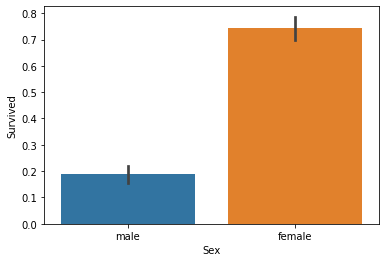

In [11]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

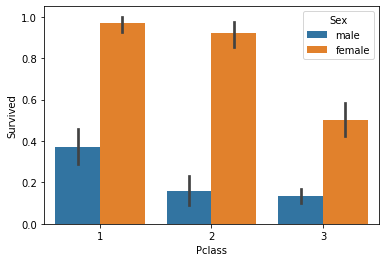

In [12]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

In [13]:
def get_category(age):
    category = ''
    age_class = ((-1, 'Unknown'), (5, 'Baby'), (12, 'Child'), (18, 'Teenager'), (25, 'Student'), (35, 'Young Adult'), (60, 'Adult'))
    for class_age, class_name in age_class:
        if age <= class_age:
            return class_name
    return 'Elderly'

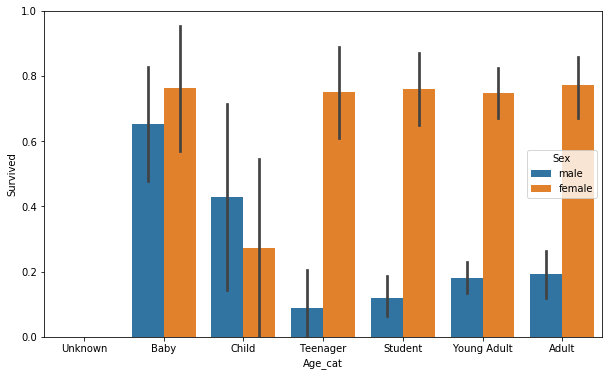

In [14]:
plt.figure(figsize=(10, 6))

group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult']

titanic_df['Age_cat'] = titanic_df['Age'].apply(get_category)
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

In [17]:
from sklearn import preprocessing

def encode_features(data_df):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(data_df[feature])
        data_df[feature] = le.transform(data_df[feature])
    return data_df

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [33]:
def fillna(df):
    df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

In [34]:
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

In [38]:
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

In [36]:
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [45]:
titanic_df = pd.read_csv('./train_data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
x_titanic_df = titanic_df.drop('Survived', axis=1)

x_titanic_df = transform_features(x_titanic_df)

In [46]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)

dt_clf.fit(x_train, y_train)
dt_pred = dt_clf.predict(x_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

DecisionTreeClassifier 정확도: 0.7877


In [48]:
rf_clf = RandomForestClassifier(random_state=11)

rf_clf.fit(x_train, y_train)
rf_pred = dt_clf.predict(x_test)
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))

RandomForestClassifier 정확도: 0.7877


In [51]:
lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(x_train, y_train)
lr_pred = dt_clf.predict(x_test)
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))

LogisticRegression 정확도: 0.7877


In [60]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    
    for iter_count, (train_index, test_index) in enumerate(kfold.split(x_titanic_df)):
        x_train, x_test = x_titanic_df.values[train_index], x_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        clf.fit(x_train, y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print(f"교차 검증 {iter_count} 정확도: {accuracy:0.4f}")
    
    mean_score = np.mean(scores)
    print(f"평균 정확도: {mean_score:0.4f}")

In [61]:
exec_kfold(dt_clf, folds=5)

교차 검증 0 정확도: 0.7542
교차 검증 1 정확도: 0.7809
교차 검증 2 정확도: 0.7865
교차 검증 3 정확도: 0.7697
교차 검증 4 정확도: 0.8202
평균 정확도: 0.7823


In [62]:
exec_kfold(rf_clf, folds=5)

교차 검증 0 정확도: 0.7933
교차 검증 1 정확도: 0.8090
교차 검증 2 정확도: 0.8371
교차 검증 3 정확도: 0.7753
교차 검증 4 정확도: 0.8596
평균 정확도: 0.8148


In [63]:
exec_kfold(lr_clf, folds=5)

교차 검증 0 정확도: 0.7933
교차 검증 1 정확도: 0.7921
교차 검증 2 정확도: 0.7753
교차 검증 3 정확도: 0.7472
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7901


In [65]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, x_titanic_df, y_titanic_df, cv=5)
for iter_count, accuracy in enumerate(scores):
    print(f"교차 검증 {iter_count} 정확도: {accuracy:0.4f}")
print(f"평균 정확도: {np.mean(scores):0.4f}")

교차 검증 0 정확도: 0.7430
교차 검증 1 정확도: 0.7753
교차 검증 2 정확도: 0.7921
교차 검증 3 정확도: 0.7865
교차 검증 4 정확도: 0.8427
평균 정확도: 0.7879


In [68]:
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth': [2, 3, 5, 10],
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1, 5, 8]}

grid_dclf = GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(x_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터:', grid_dclf.best_params_)
print(f'GridSearchCV 최고 정확도: {grid_dclf.best_score_:0.4f}')
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(x_test)
accuracy = accuracy_score(y_test, dpredictions)
print(f'테스트 세트에서 DecisionTreeClassifier 정확도: {accuracy:0.4f}')

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서 DecisionTreeClassifier 정확도: 0.8715
